In [1]:
import pandas as pd
import numpy as np
from numpy import loadtxt

# Reading crime dataset

In [2]:
train_crime = open('train-crime.csv', 'rb')
X_train = loadtxt(train_crime,delimiter = ",")
#print(X_train)
X_train.shape

(1695, 100)

In [3]:
trainR_crime = open('trainR-crime.csv', 'rb')
y_train = loadtxt(trainR_crime,delimiter = ",")
print(y_train)

[-0.2059   -0.33463  -0.89246  ... -0.84955   0.48067   0.094476]


In [4]:
test_crime = open('test-crime.csv', 'rb')
X_test = loadtxt(test_crime,delimiter = ",")
#print(X_test)
#print(X_test.shape)

In [5]:
testR_crime = open('testR-crime.csv', 'rb')
y_test = loadtxt(testR_crime,delimiter = ",")
#print(y_test)
#print(y_test.shape)

# Reading housing dataset

In [6]:
train_housing = open('train-housing.csv', 'rb')
X_train_housing = loadtxt(train_housing,delimiter = ",")
#print(X_train_housing)
X_train_housing.shape

(102, 13)

In [7]:
trainR_housing = open('trainR-housing.csv', 'rb')
y_train_housing = loadtxt(trainR_housing,delimiter = ",")
y_train_housing.shape
#print(y_train_housing)

(102,)

In [8]:
test_housing = open('test-housing.csv', 'rb')
X_test_housing = loadtxt(test_housing,delimiter = ",")
#print(X_test_housing)
#print(X_test_housing.shape)

In [9]:
testR_housing = open('testR-housing.csv', 'rb')
y_test_housing = loadtxt(testR_housing,delimiter = ",")
#print(y_test_housing)
print(y_test_housing.shape)

(404,)


# Splitting the crime dataset into 10 parts as .1, .2, .3, ..., 1

In [10]:
xtrain1 = X_train[0 : 169, : ]
xtrain2 = X_train[0 : 339, : ]
xtrain3 = X_train[0 : 508, : ]
xtrain4 = X_train[0 : 678, : ]
xtrain5 = X_train[0 : 847, : ]
xtrain6 = X_train[0 : 1017, : ]
xtrain7 = X_train[0 : 1186, : ]
xtrain8 = X_train[0 : 1356, : ]
xtrain9 = X_train[0 : 1525, : ]
xtrain10 = X_train[0 : 1695, : ]

In [11]:
ytrain1 = y_train[:169]
ytrain2 = y_train[:339]
ytrain3 = y_train[:508]
ytrain4 = y_train[:678]
ytrain5 = y_train[:847]
ytrain6 = y_train[:1017]
ytrain7 = y_train[:1186]
ytrain8 = y_train[:1356]
ytrain9 = y_train[:1525]
ytrain10 = y_train[:1695]

# Splitting the housing dataset into 10 parts as .1, .2, .3, ..., 1

In [12]:
xtrain_h1 = X_train_housing[0 : 10, : ]
xtrain_h2 = X_train_housing[0 : 20, : ]
xtrain_h3 = X_train_housing[0 : 30, : ]
xtrain_h4 = X_train_housing[0 : 40, : ]
xtrain_h5 = X_train_housing[0 : 51, : ]
xtrain_h6 = X_train_housing[0 : 61, : ]
xtrain_h7 = X_train_housing[0 : 71, : ]
xtrain_h8 = X_train_housing[0 : 81, : ]
xtrain_h9 = X_train_housing[0 : 91, : ]
xtrain_h10 = X_train_housing[0 : 102, : ]

In [13]:
ytrain_h1 = y_train_housing[:10]
ytrain_h2 = y_train_housing[:20]
ytrain_h3 = y_train_housing[:30]
ytrain_h4 = y_train_housing[:40]
ytrain_h5 = y_train_housing[:51]
ytrain_h6 = y_train_housing[:61]
ytrain_h7 = y_train_housing[:71]
ytrain_h8 = y_train_housing[:81]
ytrain_h9 = y_train_housing[:91]
ytrain_h10 = y_train_housing[:102]

# MSE Function

In [14]:
def MSE(y_test, y_pred):
    MSE = np.square(np.subtract(y_test,y_pred)).mean()
    return MSE

# MLE Function

In [15]:
#w = (λI + ΦTΦ) ^−1 ΦTt.


In [16]:
def MLE(X_train, y_train, X_test, lamb):
    #lamb = 0
    a = np.linalg.pinv(lamb*np.identity(X_train.shape[1]) + np.transpose(X_train).dot(X_train))
    w = a.dot(np.transpose(X_train)).dot(y_train)
    prediction = X_test.dot(w)
    
    return prediction

# Model selection function

In [17]:
def ModelSelection(X_train, y_train):
    phi = X_train
    t = y_train
    N = phi.shape[0]
    d = phi.shape[1]
    alpha0, beta0 = 2,10
    alpha_change,beta_change = 1,1
    while not(alpha_change<=0.001 and beta_change<=0.001):
        A = beta0*np.dot(X_train.T,X_train)
        sn = np.linalg.inv(alpha0*np.identity(d) + A)
        mn = beta0*np.dot(np.dot(sn,X_train.T),y_train)
        lambda_ = np.linalg.eigvals(A)
        gamma = 0
        for i in range(0,len(lambda_)):
            gamma+=(lambda_[i]/(alpha0+lambda_[i]))
            
        alpha1 = gamma/np.dot(mn,mn)
        beta1 = 1/((1/(N-gamma))*(np.dot(np.dot(X_train,mn)-y_train, np.dot(X_train,mn)-y_train)))

        alpha_change = abs(alpha1-alpha0)
        beta_change = abs(beta1 - beta0)

        beta0 = beta1
        alpha0 = alpha1
        
    reg_lambda = alpha0.real/beta0.real
    return alpha0.real, beta0.real, reg_lambda

# Bayesian function

In [18]:
def bayesian(alpha, beta, X_train, y_train, X_test):  
    d = X_train.shape[1]
    A = beta*np.dot(X_train.T,X_train)
    sn = np.linalg.inv(alpha*np.identity(d) + A)
    mn = beta*np.dot(np.dot(sn,X_train.T),y_train)
    prediction = (X_test).dot(mn)
    return prediction

# Task 1

## Part 1

### printing α, β and effective λ for each train size of Crime dataset.

In [19]:
crime={}
for r in range(1,11):
    s=int(round(len(X_train)*r/10,0))
    x_sub = X_train[:s]
    y_sub = y_train[:s]
    alpha,beta,l = ModelSelection(x_sub, y_sub)
    crime[r/10]= (round(alpha,4),round(beta,4))

In [20]:
for row in crime:
    print("For partition ",row, "----> alpha:",
          crime[row][0], "beta:",crime[row][1], "lambda:", round(crime[row][0]/crime[row][1],4))

For partition  0.1 ----> alpha: 188.6595 beta: 3.0783 lambda: 61.2869
For partition  0.2 ----> alpha: 284.722 beta: 2.9644 lambda: 96.0471
For partition  0.3 ----> alpha: 266.9901 beta: 2.8472 lambda: 93.7729
For partition  0.4 ----> alpha: 280.4488 beta: 2.8497 lambda: 98.4134
For partition  0.5 ----> alpha: 282.7676 beta: 2.9149 lambda: 97.0077
For partition  0.6 ----> alpha: 263.4755 beta: 2.9623 lambda: 88.9429
For partition  0.7 ----> alpha: 254.1616 beta: 3.0876 lambda: 82.3169
For partition  0.8 ----> alpha: 254.2067 beta: 3.1242 lambda: 81.367
For partition  0.9 ----> alpha: 247.8892 beta: 3.0471 lambda: 81.3525
For partition  1.0 ----> alpha: 239.7163 beta: 3.0853 lambda: 77.6963


### printing α, β and effective λ for each train size of Housing dataset.

In [21]:
housing={}
for r in range(1,11):
    s=int(round(len(X_train_housing)*r/10,0))
    x_sub = X_train_housing[:s]
    y_sub = y_train_housing[:s]
    alpha,beta,l = ModelSelection(x_sub, y_sub)
    housing[r/10]= (round(alpha,4),round(beta,4))

In [22]:
for row in housing:
    print("For partition ",[row], "----> alpha:",
          housing[row][0], "beta:",housing[row][1], "lambda:", round(housing[row][0]/housing[row][1],4))

For partition  [0.1] ----> alpha: 17.1157 beta: 55.4313 lambda: 0.3088
For partition  [0.2] ----> alpha: 16.3343 beta: 3.4587 lambda: 4.7227
For partition  [0.3] ----> alpha: 17.0971 beta: 4.3022 lambda: 3.974
For partition  [0.4] ----> alpha: 18.4078 beta: 5.1336 lambda: 3.5857
For partition  [0.5] ----> alpha: 17.8086 beta: 4.4115 lambda: 4.0369
For partition  [0.6] ----> alpha: 19.5364 beta: 4.6913 lambda: 4.1644
For partition  [0.7] ----> alpha: 18.6426 beta: 4.3935 lambda: 4.2432
For partition  [0.8] ----> alpha: 18.9251 beta: 4.5876 lambda: 4.1253
For partition  [0.9] ----> alpha: 16.9791 beta: 4.1692 lambda: 4.0725
For partition  [1.0] ----> alpha: 20.4125 beta: 4.0413 lambda: 5.051


## Part 2

## MLE and Bayesian for crime dataset

In [23]:
mse_mle_crime=[]
for r in range(1,11):
    s=int(round(len(X_train)*r/10,0))
    x_sub = X_train[:s]
    y_sub = y_train[:s]
    pred = MLE(x_sub, y_sub, X_test, 0)
    mse = MSE(y_test, pred)
    mse_mle_crime.append((r/10, mse))

In [24]:
mse_mle_crime

[(0.1, 1.3002479408636172),
 (0.2, 0.4967427267380541),
 (0.3, 0.45634855646314215),
 (0.4, 0.38714667059641883),
 (0.5, 0.3713426121845869),
 (0.6, 0.3644705541248856),
 (0.7, 0.35484728890387435),
 (0.8, 0.34830539217648143),
 (0.9, 0.3463928082504861),
 (1.0, 0.3450569330423569)]

In [25]:
mse_bayesian_crime=[]
for r in range(1,11):
    s=int(round(len(X_train)*r/10,0))
    x_sub = X_train[:s]
    y_sub = y_train[:s]
    pred = bayesian(crime[r/10][0],crime[r/10][1],x_sub, y_sub, X_test)
    mse = MSE(y_test, pred)
    mse_bayesian_crime.append((r/10, mse))

In [26]:
mse_bayesian_crime

[(0.1, 0.39706429262398907),
 (0.2, 0.34524708583492153),
 (0.3, 0.34826119849435505),
 (0.4, 0.3378816740262159),
 (0.5, 0.33866577001711784),
 (0.6, 0.3328209555449343),
 (0.7, 0.3307766575087396),
 (0.8, 0.33244629863584524),
 (0.9, 0.33213979157960843),
 (1.0, 0.3345435972106491)]

## MLE and Bayesian for housing dataset

In [27]:
mse_mle_housing=[]
for r in range(1,11):
    s=int(round(len(X_train_housing)*r/10,0))
    x_sub = X_train_housing[:s]
    y_sub = y_train_housing[:s]
    pred = MLE(x_sub, y_sub, X_test_housing, 0)
    mse = MSE(y_test_housing, pred)
    mse_mle_housing.append((r/10, mse))

In [28]:
mse_mle_housing

[(0.1, 0.8678327090953848),
 (0.2, 0.6531445531536013),
 (0.3, 0.3736963444198246),
 (0.4, 0.3414166696345161),
 (0.5, 0.3644021055620389),
 (0.6, 0.32080556108532404),
 (0.7, 0.3141824758819998),
 (0.8, 0.30051685692609026),
 (0.9, 0.31907890073457246),
 (1.0, 0.29443262001271514)]

In [29]:
mse_bayesian_housing=[]
for r in range(1,11):
    s=int(round(len(X_train_housing)*r/10,0))
    x_sub = X_train_housing[:s]
    y_sub = y_train_housing[:s]
    pred = bayesian(housing[r/10][0],housing[r/10][1],x_sub, y_sub, X_test_housing)
    mse = MSE(y_test_housing, pred)
    mse_bayesian_housing.append((r/10, mse))

In [30]:
mse_bayesian_housing

[(0.1, 0.4739344870045185),
 (0.2, 0.31785366559886585),
 (0.3, 0.3145821480396295),
 (0.4, 0.31017943952079047),
 (0.5, 0.3208920503788013),
 (0.6, 0.29966196852738025),
 (0.7, 0.2942475130868702),
 (0.8, 0.2880966683758233),
 (0.9, 0.30259974587036587),
 (1.0, 0.2884936452907605)]

In [31]:
import matplotlib.pyplot as plt

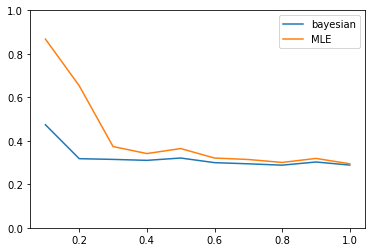

In [32]:
plt.plot(*zip(*mse_bayesian_housing),label='bayesian')
plt.plot(*zip(*mse_mle_housing),label='MLE')
plt.ylim([0,1])
plt.legend()
plt.show()

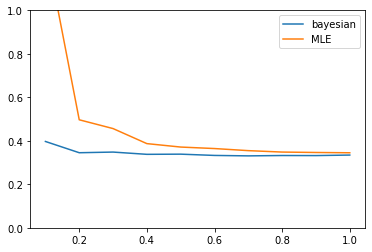

In [33]:
plt.plot(*zip(*mse_bayesian_crime),label='bayesian')
plt.plot(*zip(*mse_mle_crime),label='MLE')
plt.ylim([0,1])
plt.legend()
plt.show()

In [34]:
# We can observe here that as the training size increases, both MLE and the Bayesian performs better.
# That is, with increase in training size, the MSE of both of them decreases.

In [35]:
# We can also observe that Bayesian performs better than MLE for smaller size data and as the data size increases
# the MLE becomes better and better and finally comes close to Bayesian for large dataset

In [36]:
# It is as expected because the Bayesian uses prior alpha, beta and updates them to get closer to minimum. Because of
# that it performs better than the MLE on smaller datasets. 
# MLE doesn't use prior so it is bad for smaller datasets

In [37]:
# But when data size increases the prior is no longer required, so MLE performs similar to Bayesian

## Part 3

## MSE for different values of lambda for housing dataset

In [38]:
lambda_ = [1.0, 33.0, 100.0, 1000.0]
mse_housing_l1=[]
for r in range(1,11):
    s=int(round(len(X_train_housing)*r/10,0))
    x_sub = X_train_housing[:s]
    y_sub = y_train_housing[:s]
    pred = MLE(x_sub, y_sub, X_test_housing, 1)
    mse = MSE(y_test_housing, pred)
    mse_housing_l1.append((r/10, mse))
mse_housing_l1

[(0.1, 0.4235666713465894),
 (0.2, 0.36434710396246517),
 (0.3, 0.3339579206985387),
 (0.4, 0.324522137257965),
 (0.5, 0.3465678845328673),
 (0.6, 0.3121350227356342),
 (0.7, 0.3064930898153735),
 (0.8, 0.29565013092780723),
 (0.9, 0.31340436821154166),
 (1.0, 0.2924356280547148)]

In [39]:
mse_housing_l2=[]
for r in range(1,11):
    s=int(round(len(X_train_housing)*r/10,0))
    x_sub = X_train_housing[:s]
    y_sub = y_train_housing[:s]
    pred = MLE(x_sub, y_sub, X_test_housing, 33)
    mse = MSE(y_test_housing, pred)
    mse_housing_l2.append((r/10, mse))
mse_housing_l2

[(0.1, 0.6228938094966632),
 (0.2, 0.43120043352934057),
 (0.3, 0.3619891003903364),
 (0.4, 0.3462342507393796),
 (0.5, 0.35352782157606866),
 (0.6, 0.33658550947382077),
 (0.7, 0.31340187896536814),
 (0.8, 0.31097976804031685),
 (0.9, 0.3070775856656071),
 (1.0, 0.30544116862297066)]

In [40]:
mse_housing_l3=[]
for r in range(1,11):
    s=int(round(len(X_train_housing)*r/10,0))
    x_sub = X_train_housing[:s]
    y_sub = y_train_housing[:s]
    pred = MLE(x_sub, y_sub, X_test_housing, 100)
    mse = MSE(y_test_housing, pred)
    mse_housing_l3.append((r/10, mse))
mse_housing_l3

[(0.1, 0.7528468192512343),
 (0.2, 0.5860306395284414),
 (0.3, 0.49690742369558905),
 (0.4, 0.46520782011366174),
 (0.5, 0.46523221726870534),
 (0.6, 0.43991054865547985),
 (0.7, 0.3927385261620824),
 (0.8, 0.3880565035135051),
 (0.9, 0.36887825341728286),
 (1.0, 0.3681112017016033)]

In [41]:
mse_housing_l4=[]
for r in range(1,11):
    s=int(round(len(X_train_housing)*r/10,0))
    x_sub = X_train_housing[:s]
    y_sub = y_train_housing[:s]
    pred = MLE(x_sub, y_sub, X_test_housing, 1000)
    mse = MSE(y_test_housing, pred)
    mse_housing_l4.append((r/10, mse))
mse_housing_l4

[(0.1, 0.953727842908941),
 (0.2, 0.9009342810382331),
 (0.3, 0.8630435053994345),
 (0.4, 0.8358504606601795),
 (0.5, 0.8121887269030446),
 (0.6, 0.7845764141233204),
 (0.7, 0.7380347740786494),
 (0.8, 0.7254527905844242),
 (0.9, 0.7114874135618316),
 (1.0, 0.701970142200352)]

## MSE for different values of lambda for crime dataset

In [42]:
mse_crime_l1=[]
for r in range(1,11):
    s=int(round(len(X_train)*r/10,0))
    x_sub = X_train[:s]
    y_sub = y_train[:s]
    pred = MLE(x_sub, y_sub, X_test, 1)
    mse = MSE(y_test, pred)
    mse_crime_l1.append((r/10, mse))
mse_crime_l1

[(0.1, 0.6858603980070597),
 (0.2, 0.4629145941320785),
 (0.3, 0.439131069391032),
 (0.4, 0.38073610932899266),
 (0.5, 0.3685403392386194),
 (0.6, 0.36203020128751595),
 (0.7, 0.35245424929419433),
 (0.8, 0.3472131129940149),
 (0.9, 0.34545772651943507),
 (1.0, 0.3447620798666061)]

In [43]:
mse_crime_l2=[]
for r in range(1,11):
    s=int(round(len(X_train)*r/10,0))
    x_sub = X_train[:s]
    y_sub = y_train[:s]
    pred = MLE(x_sub, y_sub, X_test, 33)
    mse = MSE(y_test, pred)
    mse_crime_l2.append((r/10, mse))
mse_crime_l2

[(0.1, 0.4138608323002306),
 (0.2, 0.3672197335103893),
 (0.3, 0.3700775052617793),
 (0.4, 0.3503675088360651),
 (0.5, 0.34952140373862894),
 (0.6, 0.3421520939712674),
 (0.7, 0.33776025019091455),
 (0.8, 0.33791258111563244),
 (0.9, 0.33695100963174685),
 (1.0, 0.3385348019256758)]

In [44]:
mse_crime_l3=[]
for r in range(1,11):
    s=int(round(len(X_train)*r/10,0))
    x_sub = X_train[:s]
    y_sub = y_train[:s]
    pred = MLE(x_sub, y_sub, X_test, 100)
    mse = MSE(y_test, pred)
    mse_crime_l3.append((r/10, mse))
mse_crime_l3

[(0.1, 0.3867142797488236),
 (0.2, 0.3446419458517149),
 (0.3, 0.34721774532290317),
 (0.4, 0.337721473062302),
 (0.5, 0.3383730466455547),
 (0.6, 0.33180639669842826),
 (0.7, 0.32935117305944106),
 (0.8, 0.3311361569946165),
 (0.9, 0.3309373987423095),
 (1.0, 0.3331851548679825)]

In [45]:
mse_crime_l4=[]
for r in range(1,11):
    s=int(round(len(X_train)*r/10,0))
    x_sub = X_train[:s]
    y_sub = y_train[:s]
    pred = MLE(x_sub, y_sub, X_test, 1000)
    mse = MSE(y_test, pred)
    mse_crime_l4.append((r/10, mse))
mse_crime_l4

[(0.1, 0.35176188300956496),
 (0.2, 0.3308312345780616),
 (0.3, 0.3278070039250276),
 (0.4, 0.32228036024027035),
 (0.5, 0.32314096750161103),
 (0.6, 0.31949498622635486),
 (0.7, 0.3191433481165504),
 (0.8, 0.31970292616411555),
 (0.9, 0.3191947690494704),
 (1.0, 0.32042423045873375)]

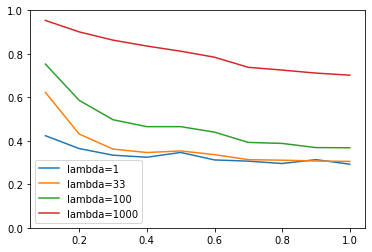

In [46]:
plt.plot(*zip(*mse_housing_l1),label='lambda=1')
plt.plot(*zip(*mse_housing_l2),label='lambda=33')
plt.plot(*zip(*mse_housing_l3),label='lambda=100')
plt.plot(*zip(*mse_housing_l4),label='lambda=1000')
plt.ylim([0,1])
plt.legend()
plt.show()

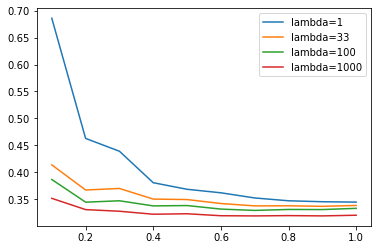

In [47]:
plt.plot(*zip(*mse_crime_l1),label='lambda=1')
plt.plot(*zip(*mse_crime_l2),label='lambda=33')
plt.plot(*zip(*mse_crime_l3),label='lambda=100')
plt.plot(*zip(*mse_crime_l4),label='lambda=1000')
#plt.ylim([0,1])
plt.legend()
plt.show()

In [48]:
# we can't use universal lambda

In [49]:
# It is successful for housing data 

# Task 2

In [50]:
# reading f3

In [51]:
train_f3 = open('train-f3.csv', 'rb')
X_train_f3 = loadtxt(train_f3,delimiter = ",")
#print(X_train)
X_train_f3.shape

(300,)

In [52]:
trainR_f3 = open('trainR-f3.csv', 'rb')
y_train_f3 = loadtxt(trainR_f3,delimiter = ",")
#print(y_train_f3)
y_train_f3.shape

(300,)

In [53]:
test_f3 = open('test-f3.csv', 'rb')
X_test_f3 = loadtxt(test_f3,delimiter = ",")
#print(X_train)
X_test_f3.shape

(500,)

In [54]:
testR_f3 = open('testR-f3.csv', 'rb')
y_test_f3 = loadtxt(testR_f3,delimiter = ",")
#print(X_train)
y_test_f3.shape

(500,)

In [55]:
# reading f5

In [56]:
train_f5 = open('train-f5.csv', 'rb')
X_train_f5 = loadtxt(train_f5,delimiter = ",")
#print(X_train)
X_train_f5.shape

(300,)

In [57]:
trainR_f5 = open('trainR-f5.csv', 'rb')
y_train_f5 = loadtxt(trainR_f5,delimiter = ",")
#print(y_train_f3)
y_train_f5.shape

(300,)

In [58]:
test_f5 = open('test-f5.csv', 'rb')
X_test_f5 = loadtxt(test_f5,delimiter = ",")
#print(X_train)
X_test_f5.shape

(500,)

In [59]:
testR_f5 = open('testR-f5.csv', 'rb')
y_test_f5 = loadtxt(testR_f5,delimiter = ",")
#print(X_train)
y_test_f5.shape

(500,)

In [60]:
import math


In [61]:
def bayesian_task2(alpha, beta, X_train, y_train, X_test):  
    d = X_train.shape[1]
    A = beta*np.dot(X_train.T,X_train)
    sn = np.linalg.inv(alpha*np.identity(d) + A)
    mn = beta*np.dot(np.dot(sn,X_train.T),y_train)
    prediction = (X_test).dot(mn)
    return prediction, mn, sn

In [77]:
mse_bayesian_value = []
mse_mle_value = []
logev = []
for i in range(1,11):
    x_train_f3 = np.hstack((np.ones((X_train_f3.shape[0],1)), X_train_f3.reshape(X_train_f3.shape[0],1)))
    x_test_f3 = np.hstack((np.ones((X_test_f3.shape[0],1)), X_test_f3.reshape(X_test_f3.shape[0],1)))
    for j in range(2, i+1):
        x_train_f3 = np.hstack((x_train_f3, (x_train_f3[:,1]**j).reshape(x_train_f3.shape[0],1)))
        x_test_f3 = np.hstack((x_test_f3, (x_test_f3[:,1]**j).reshape(x_test_f3.shape[0],1)))
        
    mle_pred = MLE(x_train_f3, y_train_f3, x_test_f3, 0)
    mse_mle_value.append((i, MSE(y_test_f3, mle_pred)))
    alpha, beta, l = ModelSelection(x_train_f3, y_train_f3)
    bay_pred, mn, sn = bayesian_task2(alpha, beta, x_train_f3, y_train_f3, x_test_f3)
    mse_bayesian_value.append((i, MSE(y_test_f3, bay_pred)))
    
    exp = np.dot((y_train_f3 - np.dot(x_train_f3, mn)).T, (y_train_f3 - np.dot(x_train_f3, mn)))*beta/2
    exp1 = (alpha*np.dot(mn.T, mn))/2
    exp2 = np.log(np.linalg.det(np.linalg.inv(sn)))
    m = x_train_f3.shape[1]
    log = (((m/2)*np.log(alpha))+((300/2)*np.log(beta))-exp-exp1-(0.5*exp2)-(300*np.log(2*math.pi)/2))
    logev.append((i, log))


In [78]:
mse_bayesian_value

[(1, 39376476.35523856),
 (2, 39527143.96946786),
 (3, 96545.25989706726),
 (4, 149527.3157907725),
 (5, 152228.94191577882),
 (6, 165223.48682179872),
 (7, 172103.1654553859),
 (8, 181625.0751748455),
 (9, 178753.49076645623),
 (10, 219571.88415661477)]

In [79]:
mse_mle_value

[(1, 39389142.58553826),
 (2, 39495762.45900575),
 (3, 148429.38836568058),
 (4, 179627.46131843395),
 (5, 186263.6807275151),
 (6, 211370.60715117436),
 (7, 184992.29642495257),
 (8, 196641.43358936673),
 (9, 546257.7759903334),
 (10, 579316.5958650279)]

In [80]:
logev

[(1, -3048.4892729193894),
 (2, -3053.744957338956),
 (3, -2718.8888658439623),
 (4, -2718.9170919003063),
 (5, -2726.8170462141607),
 (6, -2742.4629195957996),
 (7, -2747.637942422446),
 (8, -2761.3960561086),
 (9, -2777.0407340939255),
 (10, -2794.370043375159)]

In [81]:
mse_bayesian_value1 = []
mse_mle_value1 = []
logev1 = []
for i in range(1,11):
    x_train_f5 = np.hstack((np.ones((X_train_f5.shape[0],1)), X_train_f5.reshape(X_train_f5.shape[0],1)))
    x_test_f5 = np.hstack((np.ones((X_test_f5.shape[0],1)), X_test_f5.reshape(X_test_f5.shape[0],1)))
    for j in range(2, i+1):
        x_train_f5 = np.hstack((x_train_f5, (x_train_f5[:,1]**j).reshape(x_train_f5.shape[0],1)))
        x_test_f5 = np.hstack((x_test_f5, (x_test_f5[:,1]**j).reshape(x_test_f5.shape[0],1)))
        
    mle_pred = MLE(x_train_f5, y_train_f5, x_test_f5, 0)
    mse_mle_value1.append((i, MSE(y_test_f5, mle_pred)))
    alpha, beta, l = ModelSelection(x_train_f5, y_train_f5)
    bay_pred, mn, sn = bayesian_task2(alpha, beta, x_train_f5, y_train_f5, x_test_f5)
    mse_bayesian_value1.append((i, MSE(y_test_f5, bay_pred)))
    
    exp = np.dot((y_train_f5 - np.dot(x_train_f5, mn)).T, (y_train_f5 - np.dot(x_train_f5, mn)))*beta/2
    exp1 = (alpha*np.dot(mn.T, mn))/2
    exp2 = np.log(np.linalg.det(np.linalg.inv(sn)))
    m = x_train_f5.shape[1]
    log = (((m/2)*np.log(alpha))+((300/2)*np.log(beta))-exp-exp1-(0.5*exp2)-(300*np.log(2*math.pi)/2))
    logev1.append((i, log))

In [82]:
mse_bayesian_value1

[(1, 341402524666.3644),
 (2, 341325166345.9244),
 (3, 17502035333.632416),
 (4, 17478864421.527203),
 (5, 54265.2631719478),
 (6, 69168.4831091575),
 (7, 92511.00974101803),
 (8, 96676.96086936325),
 (9, 105880.38272779557),
 (10, 103651.33063876475)]

In [83]:
mse_mle_value1

[(1, 341642661126.0124),
 (2, 341195638304.2565),
 (3, 17465602121.94851),
 (4, 17435655143.626442),
 (5, 61375.3499006928),
 (6, 79043.03733122443),
 (7, 92512.84710342463),
 (8, 90189.90562969688),
 (9, 126835.276487774),
 (10, 7703653.185180388)]

In [84]:
logev1

[(1, -4393.813804817335),
 (2, -4397.8343350130945),
 (3, -3960.0237111705774),
 (4, -3966.059713354173),
 (5, -2733.785768534937),
 (6, -2742.7355978527416),
 (7, -2752.6670780735026),
 (8, -2766.159122808286),
 (9, -2781.2519247034734),
 (10, -2798.3362819521735)]

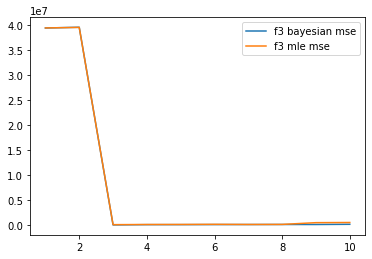

In [85]:
plt.plot(*zip(*mse_bayesian_value),label='f3 bayesian mse')
plt.plot(*zip(*mse_mle_value),label='f3 mle mse')

plt.legend()
plt.show()

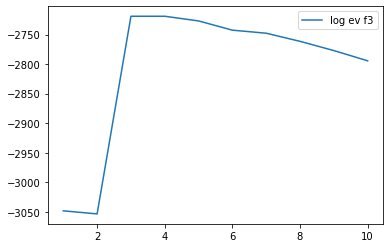

In [88]:
plt.plot(*zip(*logev),label='log ev f3')
plt.legend()
plt.show()

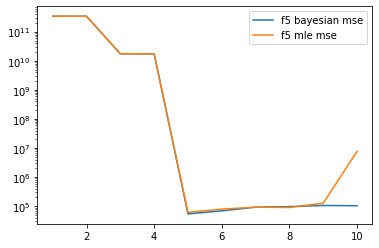

In [86]:
plt.plot(*zip(*mse_bayesian_value1),label='f5 bayesian mse')
plt.plot(*zip(*mse_mle_value1),label='f5 mle mse')
plt.yscale('log')
plt.legend()
plt.show()

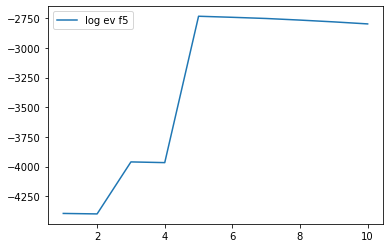

In [87]:
plt.plot(*zip(*logev1),label='log ev f5')
plt.legend()
plt.show()

In [ ]:
# the evidence maximization is successful in selecting alpha, beta and d

In [ ]:
# even non regularizeed regression performs relatively good as compared to bayesian